**Imports**

In [8]:
# Third party
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE


import seaborn as sns

# Goggle
from goggle.GoggleModel import GoggleModel

# Synthcity
from synthcity.plugins.core.dataloader import GenericDataLoader

**Load data**

In [9]:
def load_adult() -> pd.DataFrame:
    """Load the Adult dataset in a pandas dataframe"""

    path = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
    test_path = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test"

    names = [
        "age",
        "workclass",
        "fnlwgt",
        "education",
        "education-num",
        "marital-status",
        "occupation",
        "relationship",
        "race",
        "sex",
        "capital-gain",
        "capital-loss",
        "hours-per-week",
        "native-country",
        "income",
    ]

    train_df = pd.read_csv(path, names=names, index_col=False)
    test_df = pd.read_csv(test_path, names=names, index_col=False)[1:]
    
    df = pd.concat([train_df, test_df])
    df = df.applymap(lambda x: x.strip() if type(x) is str else x)

    for col in df:
        if df[col].dtype == "object":
            df = df[df[col] != "?"]
    
    df["income"].replace({'<=50K.': '<=50K', '>50K.': '>50K'}, inplace=True)

    return df

In [10]:
def preprocess_adult(dataset: pd.DataFrame) -> pd.DataFrame:
    """Preprocess adult data set."""

    replace = [
        [
            "Private",
            "Self-emp-not-inc",
            "Self-emp-inc",
            "Federal-gov",
            "Local-gov",
            "State-gov",
            "Without-pay",
            "Never-worked",
        ],
        [
            "Bachelors",
            "Some-college",
            "11th",
            "HS-grad",
            "Prof-school",
            "Assoc-acdm",
            "Assoc-voc",
            "9th",
            "7th-8th",
            "12th",
            "Masters",
            "1st-4th",
            "10th",
            "Doctorate",
            "5th-6th",
            "Preschool",
        ],
        [
            "Married-civ-spouse",
            "Divorced",
            "Never-married",
            "Separated",
            "Widowed",
            "Married-spouse-absent",
            "Married-AF-spouse",
        ],
        [
            "Tech-support",
            "Craft-repair",
            "Other-service",
            "Sales",
            "Exec-managerial",
            "Prof-specialty",
            "Handlers-cleaners",
            "Machine-op-inspct",
            "Adm-clerical",
            "Farming-fishing",
            "Transport-moving",
            "Priv-house-serv",
            "Protective-serv",
            "Armed-Forces",
        ],
        [
            "Wife",
            "Own-child",
            "Husband",
            "Not-in-family",
            "Other-relative",
            "Unmarried",
        ],
        ["White", "Asian-Pac-Islander", "Amer-Indian-Eskimo", "Other", "Black"],
        ["Female", "Male"],
        [
            "United-States",
            "Cambodia",
            "England",
            "Puerto-Rico",
            "Canada",
            "Germany",
            "Outlying-US(Guam-USVI-etc)",
            "India",
            "Japan",
            "Greece",
            "South",
            "China",
            "Cuba",
            "Iran",
            "Honduras",
            "Philippines",
            "Italy",
            "Poland",
            "Jamaica",
            "Vietnam",
            "Mexico",
            "Portugal",
            "Ireland",
            "France",
            "Dominican-Republic",
            "Laos",
            "Ecuador",
            "Taiwan",
            "Haiti",
            "Columbia",
            "Hungary",
            "Guatemala",
            "Nicaragua",
            "Scotland",
            "Thailand",
            "Yugoslavia",
            "El-Salvador",
            "Trinadad&Tobago",
            "Peru",
            "Hong",
            "Holand-Netherlands",
        ],
        [">50K", "<=50K"],
    ]


    df = dataset

    for row in replace:
        df = df.replace(row, range(len(row)))

    ind = list(range(len(df.columns)))

    ind = [x for x in ind if x != df.columns.get_loc("income")]
    col_list = df.columns[ind]

    ct = ColumnTransformer(
        [("scaler", StandardScaler(), col_list)], remainder="passthrough"
    )

    df = pd.DataFrame(ct.fit_transform(df),
                      index=df.index, columns=df.columns)

    return df

In [11]:
dataset='adult'

adult = load_adult()
adult.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [12]:
adult = preprocess_adult(adult)
adult.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,0.034201,2.905252,-1.062295,-0.984632,1.128753,0.803828,1.094941,0.491509,-0.371848,0.693813,0.142888,-0.21878,-0.078120,-0.266121,1.0
1,0.866417,0.175931,-1.007438,-0.984632,1.128753,-0.900458,-0.246686,-0.323683,-0.371848,0.693813,-0.146733,-0.21878,-2.326738,-0.266121,1.0
2,-0.041455,-0.506399,0.245284,-0.112237,-0.438122,-0.048315,0.424127,0.491509,-0.371848,0.693813,-0.146733,-0.21878,-0.078120,-0.266121,1.0
3,1.093385,-0.506399,0.425853,-0.403035,-1.221559,-0.900458,0.424127,-0.323683,2.967253,0.693813,-0.146733,-0.21878,-0.078120,-0.266121,1.0
4,-0.798015,-0.506399,1.407393,-0.984632,1.128753,-0.900458,0.088721,-1.954066,2.967253,-1.441310,-0.146733,-0.21878,-0.078120,1.881206,1.0


**Fit model**

In [13]:
X_train, X_test = train_test_split(adult, random_state=0, test_size=0.2, shuffle=True)

gen = GoggleModel(
    ds_name=dataset,
    input_dim=X_train.shape[1],
    encoder_dim=64,
    encoder_l=2,
    het_encoding=True,
    decoder_dim=16,
    decoder_l=2,
    threshold=0.1,
    decoder_arch="gcn",
    graph_prior=None,
    prior_mask=None,
    device="cpu",
    beta=1,
    batch_size=64,
    lr=1e-2
)
gen.model

Goggle(
  (learned_graph): LearnedGraph(
    (act): Sigmoid()
    (threshold): Threshold(threshold=0.1, value=0)
  )
  (encoder): Encoder(
    (encoder): Sequential(
      (0): Linear(in_features=15, out_features=64, bias=True)
      (1): ReLU()
    )
    (encode_mu): Linear(in_features=64, out_features=15, bias=True)
    (encode_logvar): Linear(in_features=64, out_features=15, bias=True)
  )
  (graph_processor): GraphInputProcessorHomo()
  (decoder): GraphDecoderHomo(
    (decoder): Sequential(
      (0): GraphConv(
        in=16, out=8, normalization=both
        (_activation): Tanh()
      )
      (1): GraphConv(in=8, out=1, normalization=both, activation=None)
    )
  )
)

In [14]:
gen.fit(X_train)

[Epoch 100/1000, patience  2] train: 6.240, val: 6.343
[Epoch 200/1000, patience  0] train: 4.650, val: 4.658
[Epoch 300/1000, patience  3] train: 4.178, val: 4.208
[Epoch 400/1000, patience 19] train: 4.001, val: 4.101
[Epoch 500/1000, patience  8] train: 3.909, val: 3.956
[Epoch 600/1000, patience  5] train: 3.723, val: 3.884
[Epoch 700/1000, patience 39] train: 3.676, val: 3.701
Training terminated after 710 epochs


**Evaluate synthetic data**

In [9]:
X_test_test, X_valid = train_test_split(X_test, random_state=0, test_size=0.5, shuffle=True)

In [11]:
X_synth = gen.sample(X_test_test)
X_synth

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,-1.251587,2.905252,-0.854135,1.454283,0.420943,1.655971,1.596880,0.491509,-0.371848,-1.441310,0.015373,-0.451160,2.040878,2.610722,1.0
1,2.805501,0.175931,1.174265,-0.452540,0.994625,-0.900458,1.520817,0.491509,2.132478,0.693813,0.278849,-0.198092,-0.120871,0.056244,0.0
2,-0.035737,0.175931,-1.371030,-0.828929,0.943788,-0.048315,-1.933346,-0.323683,-0.371848,-1.441310,-0.171618,-0.334746,0.160665,0.507981,1.0
3,-0.186590,-0.506399,0.111981,2.319462,1.913291,-0.048315,-0.962777,0.491509,-0.371848,0.693813,-0.394017,-0.355143,-0.706948,-0.054294,0.0
4,-0.291102,-0.506399,2.090014,-1.092874,-0.030719,1.655971,0.933205,2.121892,-0.371848,0.693813,-0.132993,0.049496,-0.589167,-1.164156,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9039,0.609413,-0.506399,-0.484480,1.783880,0.320150,-0.048315,-0.481786,-0.323683,-0.371848,0.693813,-0.286154,-0.207023,-0.195245,-1.897715,1.0
9040,1.724711,-0.506399,0.313299,-0.791976,0.695266,-0.048315,-0.398702,-0.323683,-0.371848,0.693813,-0.182974,-0.738385,0.014555,-1.466996,1.0
9041,-0.462914,-0.506399,1.637414,-0.730922,0.622473,-0.900458,0.899276,-1.954066,-0.371848,-1.441310,0.464101,-0.754999,-0.390614,-0.814730,0.0
9042,-1.921372,0.175931,2.755896,0.010441,-0.654505,-0.900458,-0.229790,-1.138875,-0.371848,0.693813,0.549113,-0.164137,-0.574175,-2.732893,0.0


In [12]:
X_synth_loader = GenericDataLoader(
    X_synth,
    target_column="income",
)
X_test_loader = GenericDataLoader(
    X_test_test,
    target_column="income",
)

res = gen.evaluate_synthetic(X_synth_loader, X_test_loader)
print(f"Quality: {res[0]:.3f}")
print(f"Detection: {res[2]:.3f}")
print(
    f"Performance on real: {res[1][0]:.3f}, on synth: {res[1][1]:.3f}, diff: {(res[1][0] - res[1][1]):.3f}"
)

Quality: 0.544
Detection: 0.821
Performance on real: 0.876, on synth: 0.729, diff: 0.147


### Evaluate fairness

In [23]:
from sklearn.neural_network import MLPClassifier

X_train, y_train = X_synth.drop(columns=['income']), X_synth['income']
X_test, y_test = X_test_test.drop(columns=['income']), X_test_test['income']

clf = MLPClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

dp = DP(clf, X_test, dataset=dataset)
ftu = FTU(clf, X_test, dataset=dataset)

In [18]:
columns_adult = [
    "age",
    "workclass",
    "fnlwgt",
    "education",
    "education-num",
    "marital-status",
    "occupation",
    "relationship",
    "race",
    "sex",
    "capital-gain",
    "capital-loss",
    "hours-per-week",
    "native-country",
    "income",
]

columns_credit = [
    "male",
    "age",
    "debt",
    "married",
    "bankcustomer",
    "educationlevel",
    "ethnicity",
    "yearsemployed",
    "priordefault",
    "employed",
    "creditscore",
    "driverslicense",
    "citizen",
    "zip",
    "income",
    "approved",
]

In [19]:
def DP(mlp, X_test, dataset="adult"):
    """Calculate fairness metric DP"""

    columns = columns_adult if dataset == "adult" else columns_credit
    X_test_df = pd.DataFrame(X_test, columns=columns[:-1])
    if 'ethnicity' in X_test_df:
        X_test_0 = X_test_df[X_test_df["ethnicity"] < 0.5]
        X_test_1 = X_test_df[X_test_df["ethnicity"] > 0.5]
    else:
        X_test_0 = X_test_df[X_test_df["sex"] < 0.5]
        X_test_1 = X_test_df[X_test_df["sex"] > 0.5]
    dp = abs(np.mean(mlp.predict(X_test_0)) - np.mean(mlp.predict(X_test_1)))

    return dp


def FTU(mlp, X_test, dataset="adult"):
    """Calculate fairness metric FTU"""

    columns = columns_adult if dataset == "adult" else columns_credit
    X_test_df = pd.DataFrame(X_test, columns=columns[:-1])
    if 'ethnicity' in X_test_df:
        X_test_0 = X_test_df.assign(ethnicity=0)
        X_test_1 = X_test_df.assign(ethnicity=1)
    else:
        X_test_0 = X_test_df.assign(sex=0)
        X_test_1 = X_test_df.assign(sex=1)

    ftu = abs(np.mean(mlp.predict(X_test_0)) - np.mean(mlp.predict(X_test_1)))

    return ftu

In [25]:
print(f'DP score: {dp:.3f}')
print(f'FTU score: {ftu:.3f}')

DP score: 0.369
FTU score: 0.021


**Generate TSNE plots**

In [19]:
X_test["label"] = "Original"
X_synth["label"] = "Synthetic"

concat_df = pd.concat([X_test, X_synth], axis=0)
y_data = concat_df["label"]
x_data = concat_df.drop(["label", "income"], axis=1)

In [20]:
tsne = TSNE(n_components=2, verbose=0, random_state=0)
z = tsne.fit_transform(x_data)
df = pd.DataFrame()
df["y"] = y_data
df["comp-1"] = z[:, 0]
df["comp-2"] = z[:, 1]

KeyboardInterrupt: 

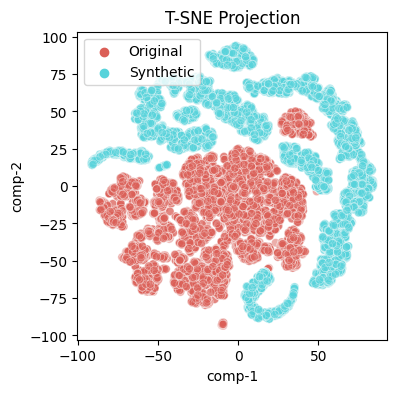

In [ ]:
plt.figure(figsize=(4, 4))
sns.scatterplot(
    x="comp-1",
    y="comp-2",
    hue=df.y.tolist(),
    palette=sns.color_palette("hls", 2),
    alpha=0.5,
    data=df,
).set(title=f"T-SNE Projection")
plt.xlabel("comp-1")
plt.ylabel("comp-2")
plt.legend()

plt.show()

**Visualise adjacency matrix**

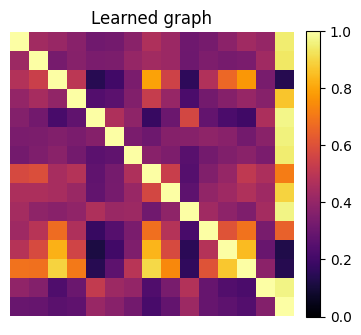

In [ ]:
adj_matrix = gen.model.learned_graph(100).cpu().detach().numpy()
plt.figure(figsize=(4, 4))
im = plt.imshow(adj_matrix, cmap="inferno", interpolation="nearest", vmin=0, vmax=1.0)
plt.colorbar(im, fraction=0.046, pad=0.04)
plt.title("Learned graph")
plt.axis("off")
plt.show()